In [4]:
from dptb.postprocess.bandstructure.band import Band
from dptb.nn.nnsk import NNSK
from dptb.utils.tools import j_loader
from dptb.nn.build import build_model
import os
from dptb.postprocess.bandstructure.band import Band
from dptb.nn.nnsk import NNSK
from dptb.utils.tools import j_loader
from dptb.nn.build import build_model
import os
from dptb.nn.dftbsk import DFTBSK
from dptb.nn.deeptb import MIX
from ase.io import read
from dptb.data import AtomicData, AtomicDataDict
import torch
import matplotlib.pyplot as plt
import numpy as np

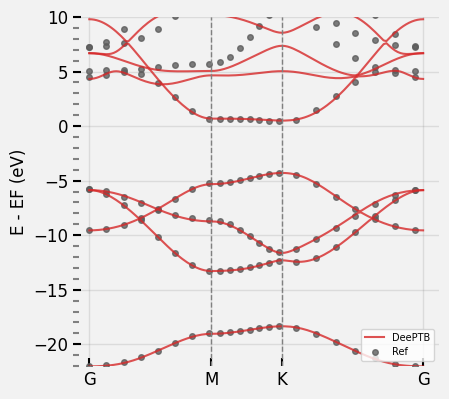

In [22]:
from dptb.nn.build import build_model
from dptb.utils.tools import j_loader
from dptb.postprocess.bandstructure.band import Band


model = build_model(checkpoint="./nnsk/checkpoint/nnsk.best.pth")
jdata = j_loader("./run/band.json")
results_path = "./band_plot"
kpath_kwargs = jdata["task_options"]
stru_data = "./data/struct.vasp"
AtomicData_options = {"r_max": 5.0,"er_max": 3.5, "oer_max":1.6, "pbc": True}

bcal = Band(model=model, 
            use_gui=False, 
            results_path='./', 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs, 
               AtomicData_options=AtomicData_options)
bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = -5,
               emin = -22,
               emax = 10)


In [8]:
model.basis

{'B': ['2s', '2p', 'd*'], 'N': ['2s', '2p', 'd*']}

(0.0, 0.6299321891494818)

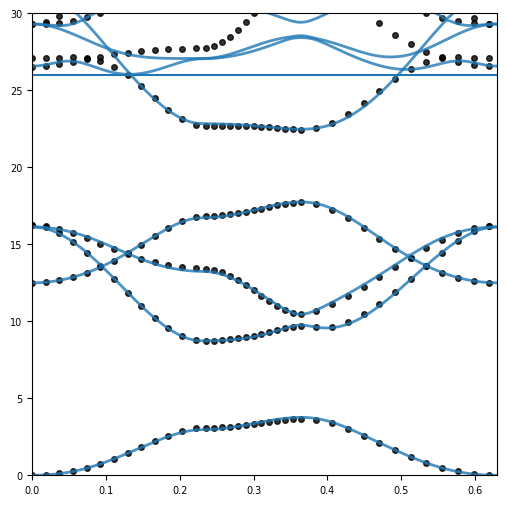

In [4]:
ref_band = np.load(kpath_kwargs["ref_band"])[0]
nintp=4
EF1= (ref_band[:,3].max() + ref_band[:,4].min() )/2
eigs =eigenstatus["eigenvalues"]
EF2 = (eigs[:,3].max() + eigs[:,4].min() )/2
plt.figure(figsize=(6, 6))
xx = eigenstatus["xlist"]
plt.plot(eigenstatus["xlist"][::nintp], ref_band[::nintp] - np.min(ref_band), 'ko', ms=4, alpha=0.8, label="Ref")
plt.plot(eigenstatus["xlist"], eigenstatus["eigenvalues"]- np.min(eigenstatus["eigenvalues"]), color="tab:blue", lw=2, alpha=0.8, label="DeePTB")
plt.axhline(26)
plt.ylim(0,30)
plt.xlim(xx.min(), xx.max())

In [1]:
from dptb.nn.dftbsk import DFTBSK
from ase.io import read
from dptb.data import AtomicData, AtomicDataDict
from dptb.utils.tools import j_loader
import torch
from dptb.postprocess.bandstructure.band import Band



TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.


In [2]:
#sk_path = './slakos/skparams.pth'
sk_path = "/Users/aisiqg/Desktop/work/github/dftb_skfiles/ParameterSets/PRIOR/complete_set"
basis = {'B':['2s','2p'],"N":["2s","2p"]}
model = DFTBSK(basis=basis, skdata=sk_path,overlap=True)

In [5]:
common_options={
            "basis": {
                "B": ["2s", "2p"],
                "N": ["2s", "2p"]
            },
            "device": "cpu",
            "dtype": "float32",
            "overlap": True,
            "seed": 42
    }
model_options={
        "dftbsk": {
            "skdata":sk_path
        }
    }
model = build_model(common_options=common_options, model_options=model_options)

Overwrite the r_max setting in the model with the r_max setting in the AtomicData_options: 5.0
This is very dangerous, please make sure you know what you are doing.
Overwrite the oer_max setting in the model with the oer_max setting in the AtomicData_options: 1.6
This is very dangerous, please make sure you know what you are doing.


/Users/aisiqg/Software/venv/pydptb/lib/python3.9/site-packages/torch/nested/__init__.py:58: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/NestedTensorImpl.cpp:180.)
  return torch._nested_tensor_from_tensor_list(tensor_list, dtype, None, device, None)


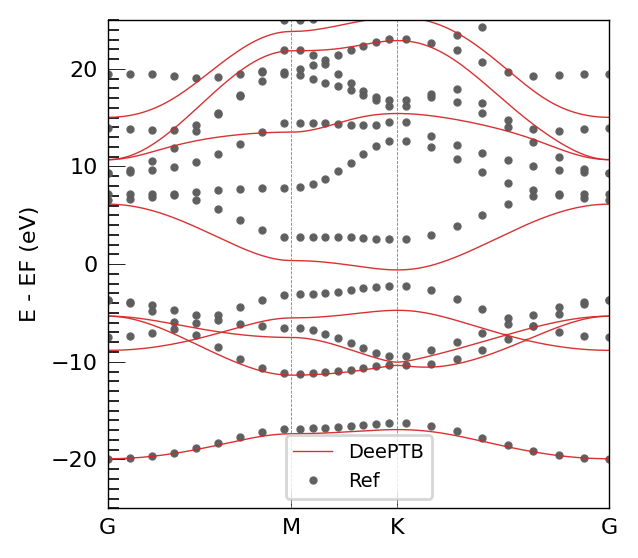

In [6]:
jdata = j_loader("./run/band.json")
results_path = "./band_plot"
kpath_kwargs = jdata["task_options"]
stru_data = "./data/struct.vasp"
AtomicData_options = {"r_max": 5.0, "oer_max":1.6, "pbc": True}
structase = read(stru_data)
#data = AtomicData.from_ase(structase, **AtomicData_options)
#data = AtomicData.to_AtomicDataDict(data)
#data = model.idp(data)
bcal = Band(model=model, 
            use_gui=False, 
            results_path='./', 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs, 
               AtomicData_options=AtomicData_options)
bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = -2,
               emin = -25,
               emax = 25)

In [8]:
import numpy as np  
import matplotlib.pyplot as plt

In [9]:
ref_band = np.load(kpath_kwargs["ref_band"])[0]
eigenstatus
nintp=4
EF1= (ref_band[:,3].max() + ref_band[:,4].min() )/2
eigs =eigenstatus["eigenvalues"]
EF2 = (eigs[:,3].max() + eigs[:,4].min() )/2
plt.figure(figsize=(6, 6))
xx = eigenstatus["xlist"]
plt.plot(eigenstatus["xlist"][::nintp], ref_band[::nintp]-EF1, 'ko', ms=4, alpha=0.8, label="Ref")
plt.plot(eigenstatus["xlist"], eigenstatus["eigenvalues"]-EF2, color="tab:blue", lw=2, alpha=0.8, label="DeePTB")
#plt.ylim(-22,16)
plt.xlim(xx.min(), xx.max())

(0.0, 0.6299321891494818)

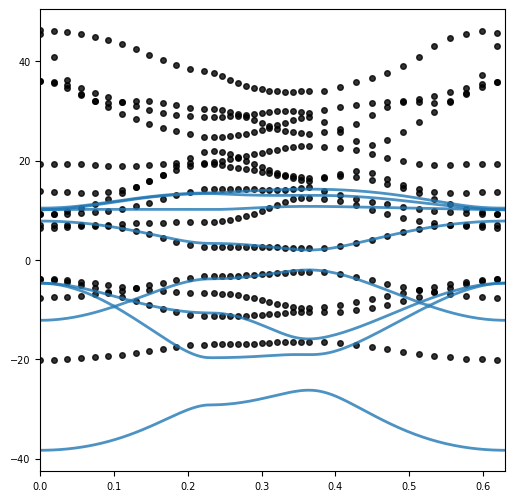

In [8]:
from dptb.postprocess.bandstructure.band import Band
from dptb.nn.nnsk import NNSK
from dptb.utils.tools import j_loader
from dptb.nn.build import build_model
import os
from dptb.nn.dftbsk import DFTBSK
from dptb.nn.deeptb import MIX
from ase.io import read
from dptb.data import AtomicData, AtomicDataDict
import torch

In [13]:
model_options={
    "embedding":{
        "method": "se2",
        "rs": 2.5,
        "rc": 5.0,
        "n_axis":None,
        "radial_net": {
            "neurons": [10,20,30],
            "activation":"tanh",
            "if_batch_normalized":False
        }
    },
    "prediction":{
        "method": "sktb",
        "neurons": [16,16,16],
        "activation":"tanh",
        "if_batch_normalized":False
    },
    "dftbsk":
    {
        "skdata" :'/Users/aisiqg/Desktop/work/github/DeePTB/examples/slakos'

    }
}
common_options={
            "basis": {'B':['2s','2p'],"N":["2s","2p"]},
            "device": "cpu",
            "dtype": "float32",
            "overlap": True,
            "seed":0
            }

In [5]:
import torch

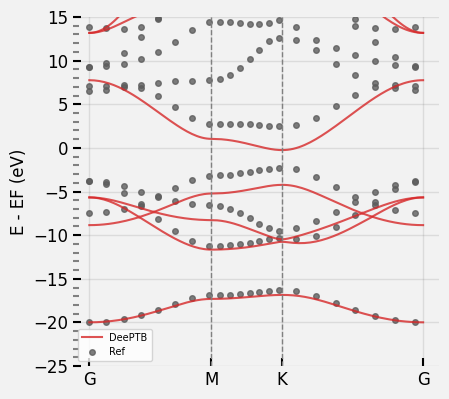

In [35]:
from dptb.nn.build import build_model
from dptb.utils.tools import j_loader
from dptb.postprocess.bandstructure.band import Band


model = build_model(checkpoint="./nnskint_overlap/checkpoint/nnsk.best.pth")

task_options={
        "task": "band",
        "kline_type":"abacus",
        "kpath":[
            [0, 0, 0, 50],
            [0.5, 0, 0, 50],
            [0.3333333, 0.3333333, 0, 50],
            [0, 0, 0, 1]
        ],
        "nel_atom":{"N":5,"B":3},
        "klabels":["G", "M", "K", "G"],
        "E_fermi":-12.798759460449219,
        "emin":-25,
        "emax":15,
        "ref_band": "./data/kpath.0/eigenvalues.npy"
    }

kpath_kwargs = task_options

stru_data = "./data/struct.vasp"
AtomicData_options = {"r_max": 5.0,"er_max": 3.5, "oer_max":1.6, "pbc": True}

bcal = Band(model=model, 
            use_gui=False, 
            results_path='./', 
            device=model.device)
eigenstatus = bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs, 
               AtomicData_options=AtomicData_options)
bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = -2.5,
               emin = -25,
               emax = 15)

